# Dati per gruppo di regioni

Variazioni giornaliere e dati dinamici per gruppo di regioni.

> Max Pierini & [NOTIZIÆ Telegram Channel](https://t.me/notiziae)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from IPython.display import Markdown

In [2]:
sns.set()
sns.set_palette('colorblind')

In [3]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv",
    usecols=[
        'denominazione_regione', 'data', 
        'totale_positivi', 'totale_ospedalizzati', 'terapia_intensiva',
        'nuovi_positivi', 'totale_casi',
        'deceduti', 'dimessi_guariti',
    ],
    parse_dates=['data'],
    index_col=['denominazione_regione', 'data'],
    squeeze=True).sort_index()

In [4]:
zone = {
    "Piemonte": "Nord",
    "Valle d'Aosta": "Nord",
    "Liguria": "Nord",
    "Lombardia": "Nord",
    "P.A. Trento": "Nord",
    "P.A. Bolzano": "Nord",
    "Veneto": "Nord",
    "Friuli Venezia Giulia": "Nord",
    "Emilia-Romagna": "Nord",
    "Toscana": "Centro",
    "Umbria": "Centro",
    "Marche": "Centro",
    "Lazio": "Centro",
    "Abruzzo": "Sud",
    "Molise": "Sud",
    "Campania": "Sud",
    "Puglia": "Sud",
    "Basilicata": "Sud",
    "Calabria": "Sud",
    "Sicilia": "Isole",
    "Sardegna": "Isole",
}

In [5]:
istat_to_dpc = {
    "Abruzzo":     'Abruzzo',
    "Basilicata":     'Basilicata',
    "Calabria":     'Calabria',
    "Campania":     'Campania',
    "Emilia-Romagna":     'Emilia-Romagna',
    "Friuli-Venezia Giulia":     'Friuli Venezia Giulia',
    "Lazio":     'Lazio',
    "Liguria":     'Liguria',
    "Lombardia":     'Lombardia',
    "Marche":     'Marche',
    "Molise":     'Molise',
    "Provincia Autonoma Bolzano / Bozen":     'P.A. Bolzano',
    "Provincia Autonoma Trento":     'P.A. Trento',
    "Piemonte":     'Piemonte',
    "Puglia":     'Puglia',
    "Sardegna":     'Sardegna',
    "Sicilia":     'Sicilia',
    "Toscana":     'Toscana',
    "Umbria":     'Umbria',
    "Valle d'Aosta / Vallée d'Aoste":     "Valle d'Aosta",
    "Veneto":     'Veneto',
}

In [6]:
pop = pd.read_csv('ISTAT_popolazione.csv')

In [7]:
pop_reg = pop[
    (pop.Sesso=='totale') & (pop.Età=='totale') & (pop.Territorio!='Trentino Alto Adige / Südtirol')
].reset_index()[['Territorio', 'Value']]

In [8]:
pop_reg["Territorio"] = pop_reg.Territorio.map(istat_to_dpc)

In [9]:
pop_reg['gruppo'] = pop_reg.Territorio.map(zone)

In [10]:
pop_grouped = pd.DataFrame(pop_reg.groupby('gruppo').Value.sum())

In [11]:
zone_txt = "\n- ".join([f"{zone[k]}: {k}" for k in zone])

In [12]:
display(Markdown(f"""
I gruppi di regioni sono identificati come:

- {zone_txt}
"""
))


I gruppi di regioni sono identificati come:

- Nord: Piemonte
- Nord: Valle d'Aosta
- Nord: Liguria
- Nord: Lombardia
- Nord: P.A. Trento
- Nord: P.A. Bolzano
- Nord: Veneto
- Nord: Friuli Venezia Giulia
- Nord: Emilia-Romagna
- Centro: Toscana
- Centro: Umbria
- Centro: Marche
- Centro: Lazio
- Sud: Abruzzo
- Sud: Molise
- Sud: Campania
- Sud: Puglia
- Sud: Basilicata
- Sud: Calabria
- Isole: Sicilia
- Isole: Sardegna


***

In [13]:
df['nuovi_deceduti'] = df.groupby('denominazione_regione')['deceduti'].diff()

In [14]:
df['nuovi_guariti'] = df.groupby('denominazione_regione')['dimessi_guariti'].diff()

In [15]:
df[df < 0] = np.nan

In [16]:
df['gruppo'] = df.index.get_level_values('denominazione_regione').map(zone)

In [17]:
df['giorno'] = df.index.get_level_values('data').normalize()

In [18]:
df_grouped = df.groupby(['gruppo', 'giorno']).sum()

In [19]:
df_italy = df_grouped.groupby('giorno').sum()

In [20]:
df_perc = df_grouped / df_italy

In [21]:
Ys = [
    'nuovi_positivi',
    'nuovi_deceduti',
    'nuovi_guariti',
    'totale_positivi',
    'totale_ospedalizzati',
    'terapia_intensiva',
]

# Nuovi Positivi

## cumulati

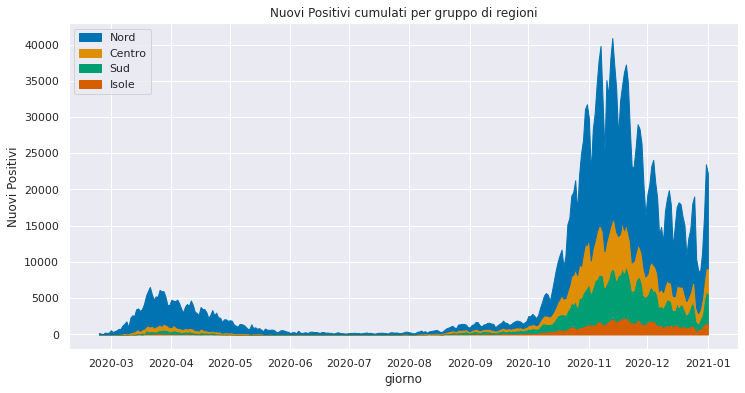

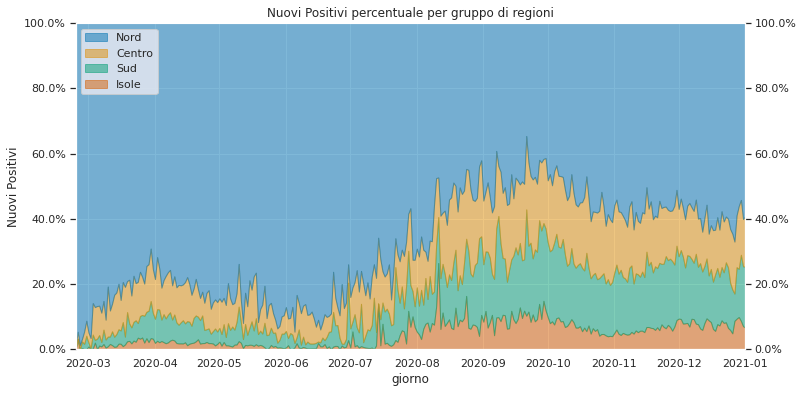

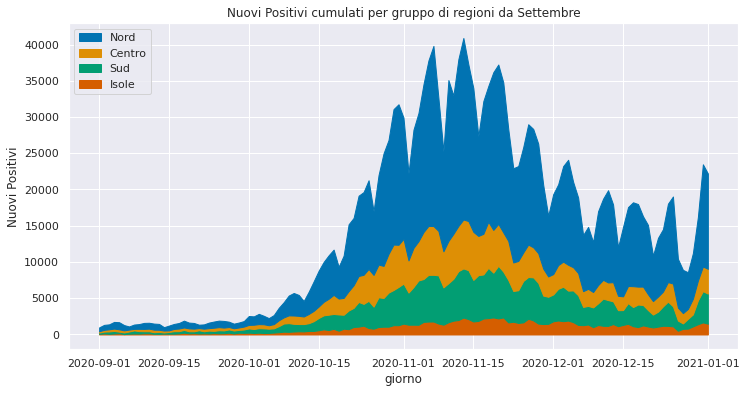

## sovrapposti

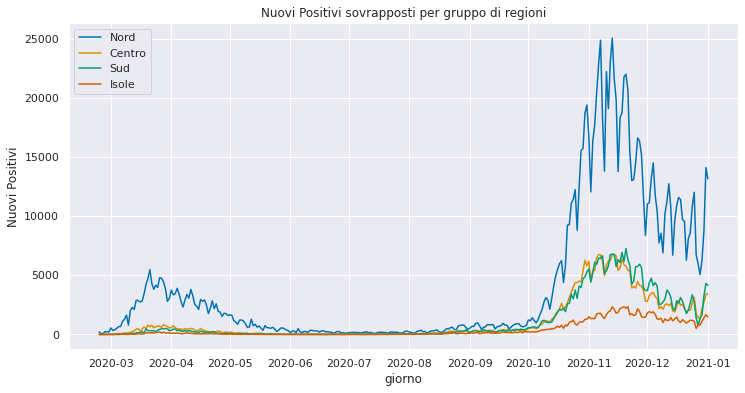

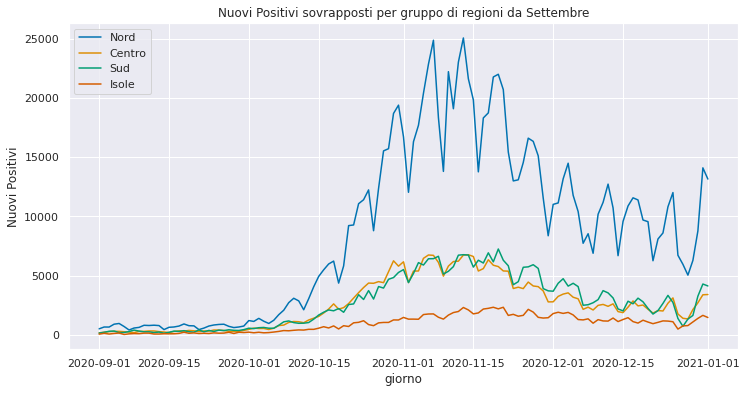

***

# Nuovi Deceduti

## cumulati

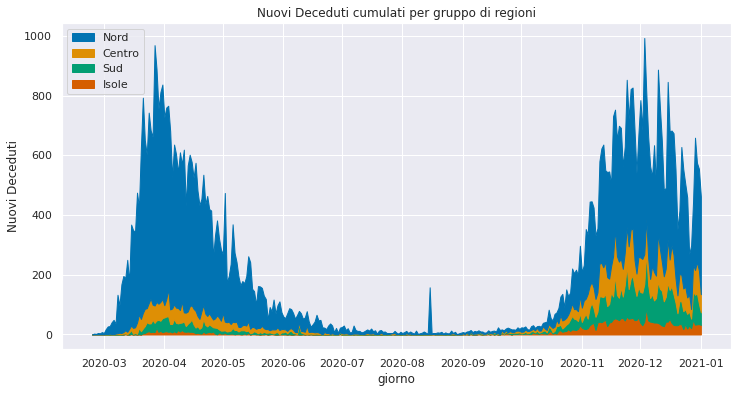

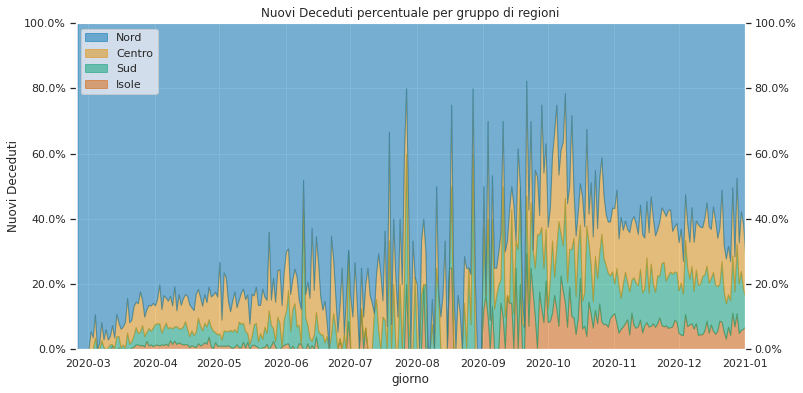

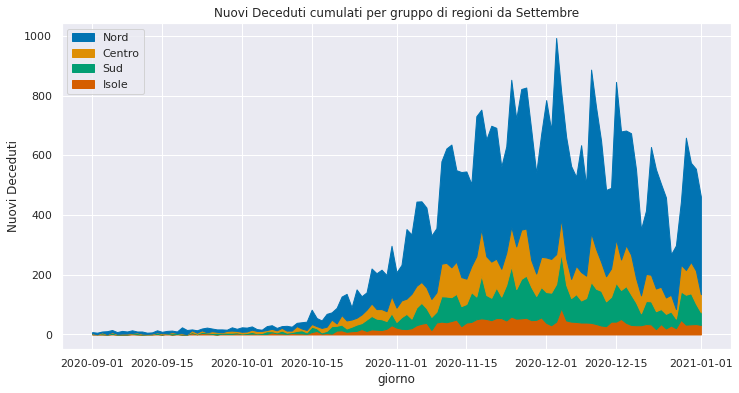

## sovrapposti

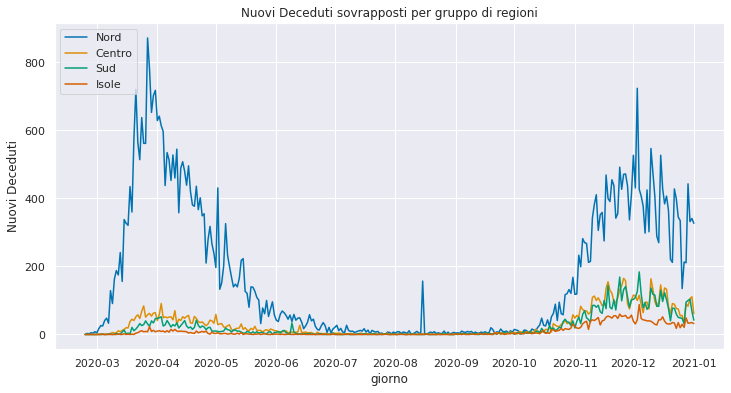

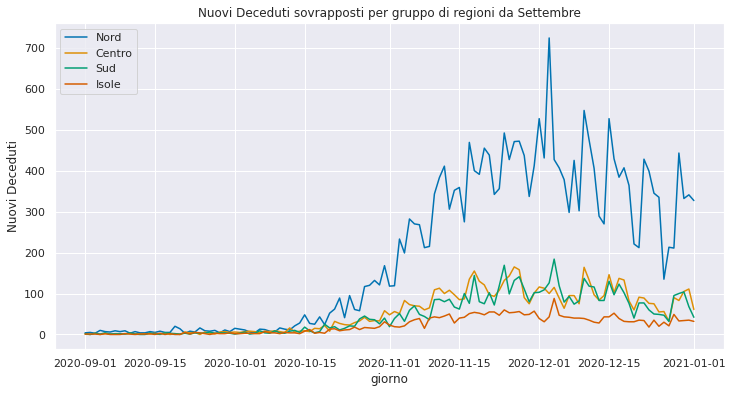

***

# Nuovi Guariti

## cumulati

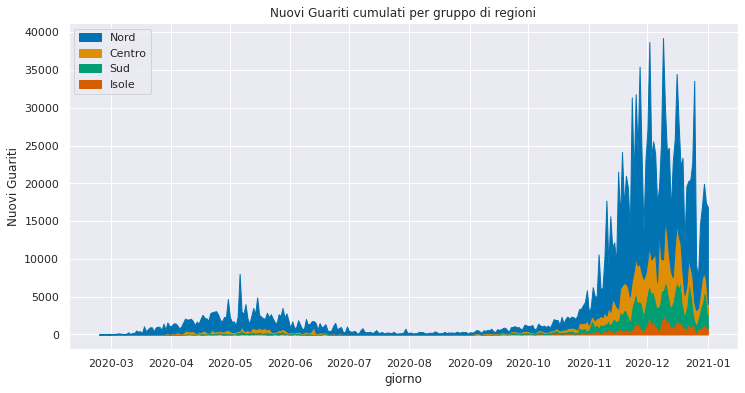

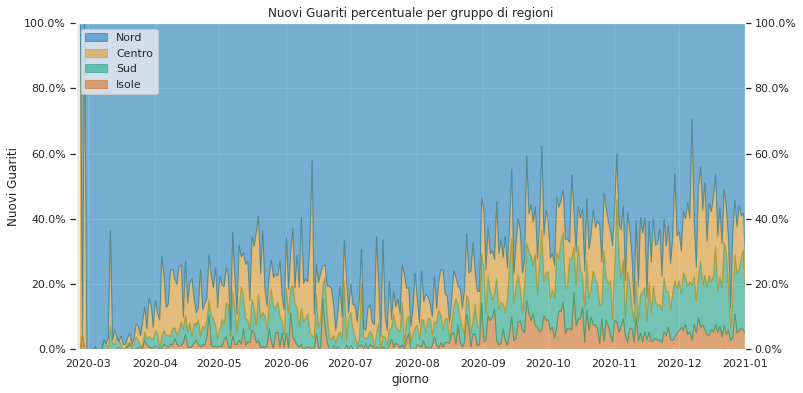

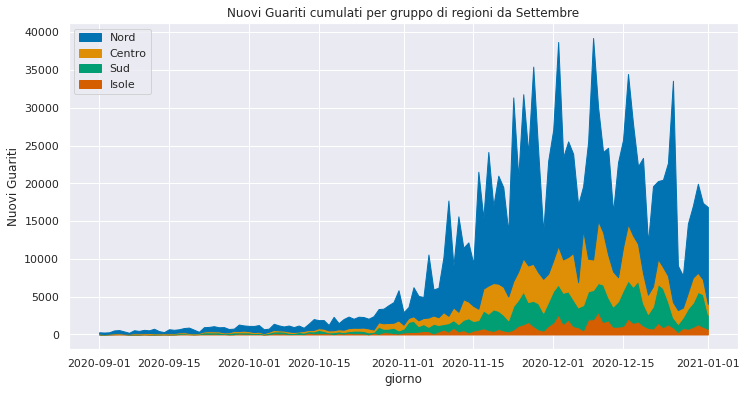

## sovrapposti

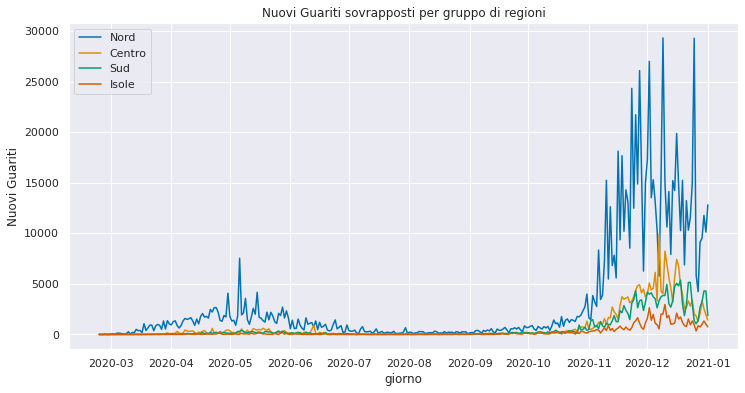

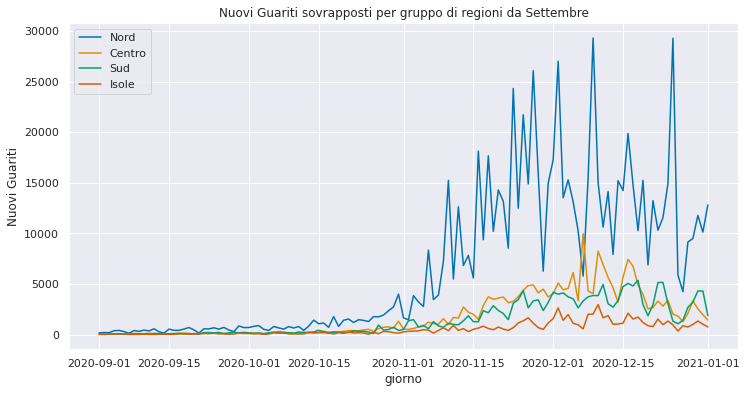

***

# Totale Positivi

## cumulati

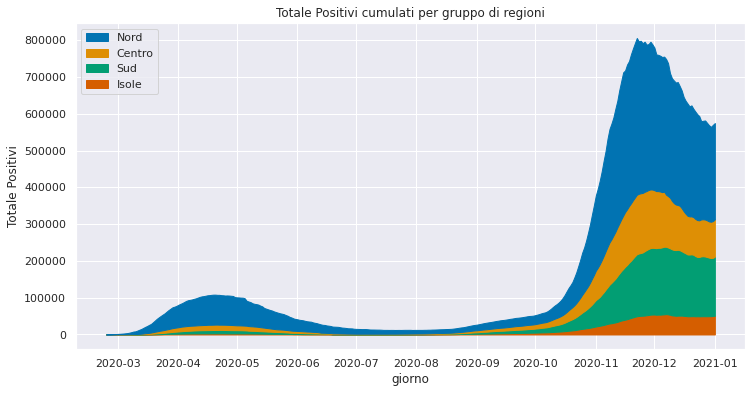

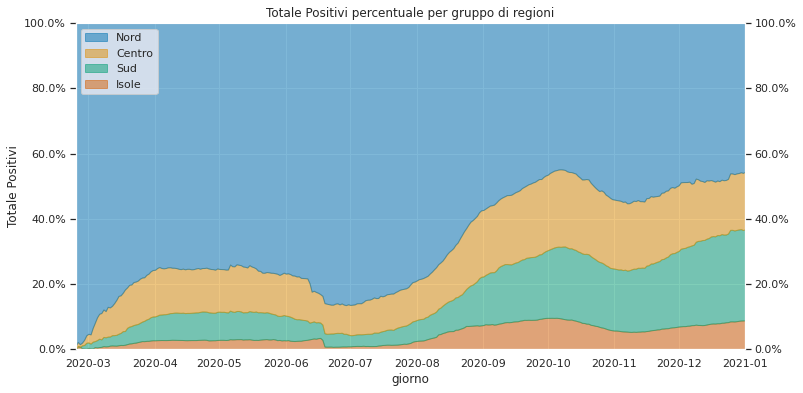

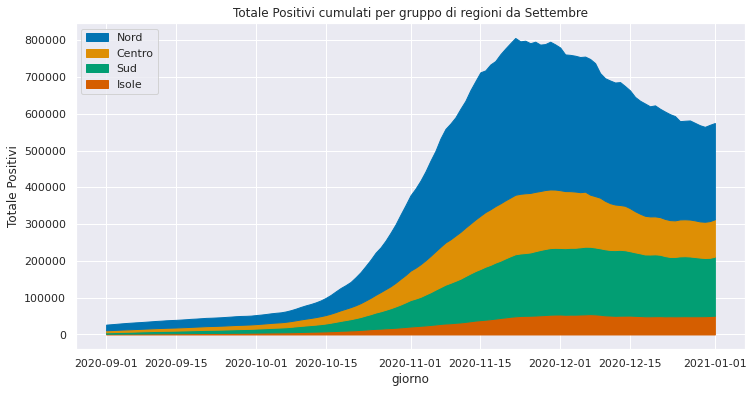

## sovrapposti

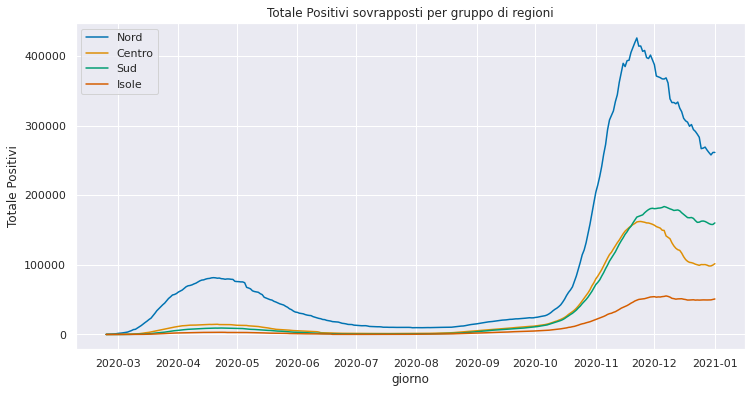

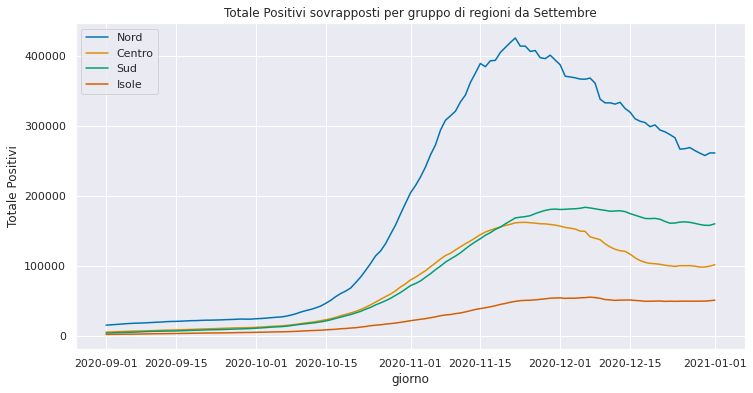

***

# Totale Ospedalizzati

## cumulati

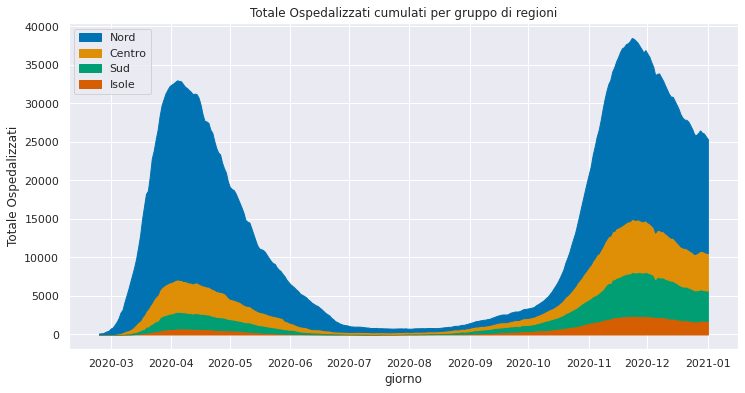

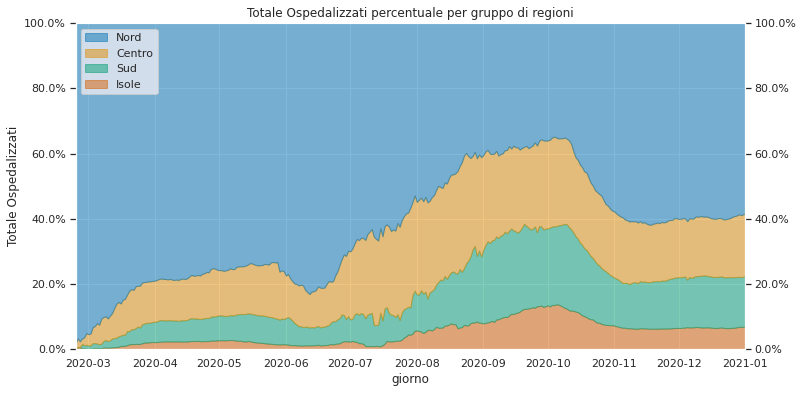

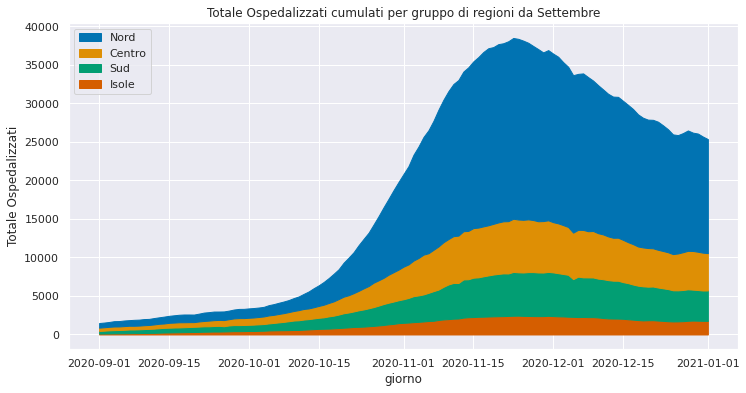

## sovrapposti

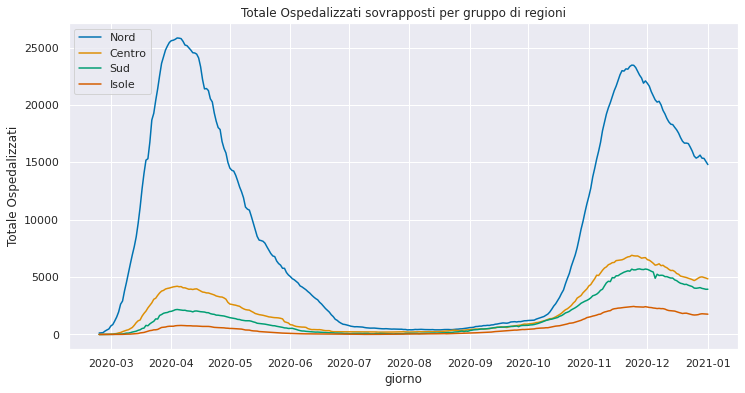

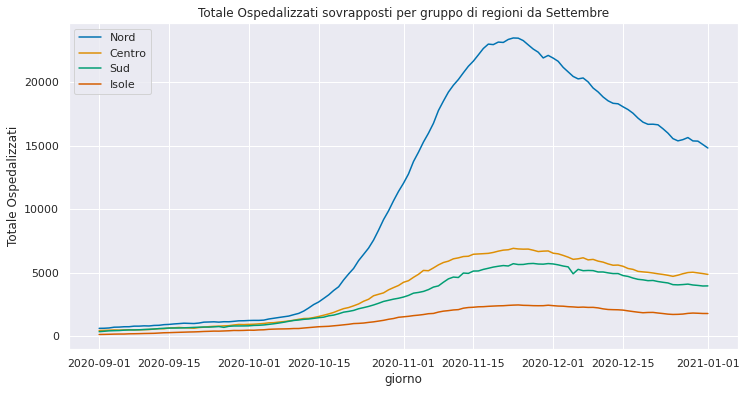

***

# Terapia Intensiva

## cumulati

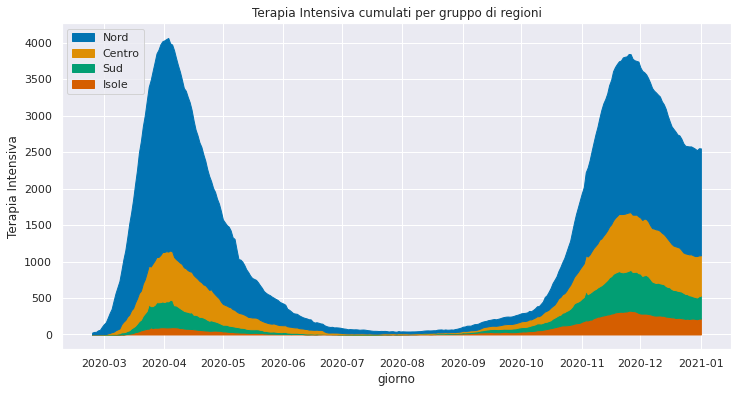

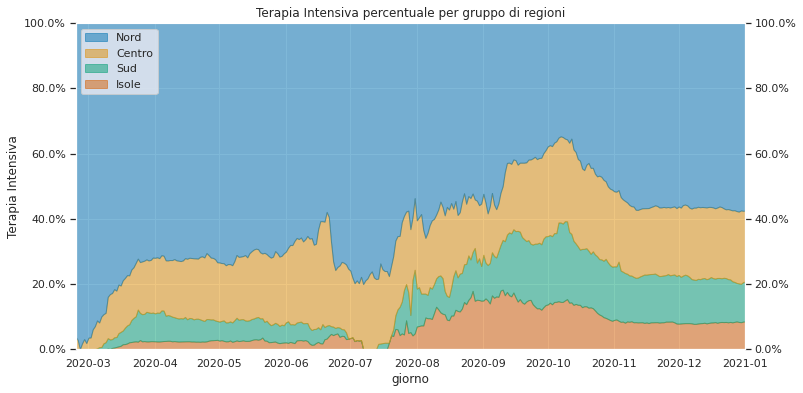

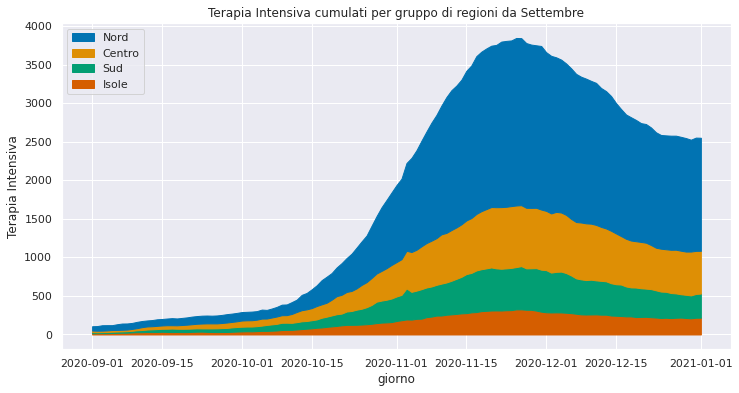

## sovrapposti

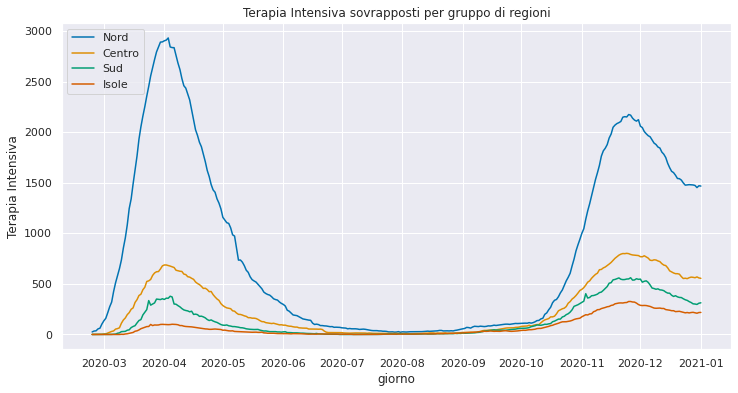

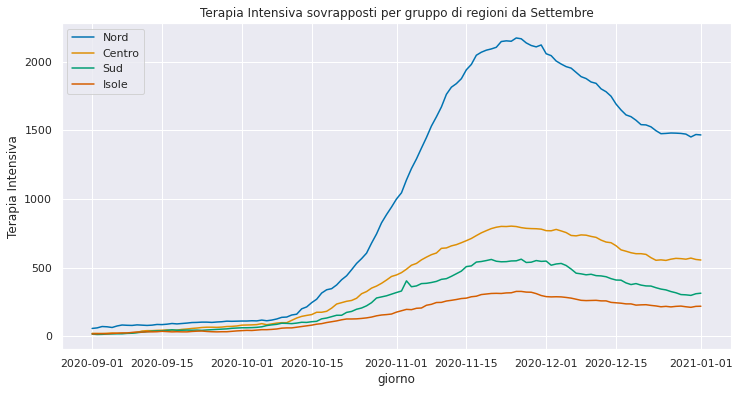

***

In [22]:
for y in Ys:
    y_name = y.replace("_", " ").title()
    display(Markdown(f"# {y_name}"))
    
    display(Markdown(f"## cumulati"))
    
    # totali
    fig, ax = plt.subplots(figsize=(12, 6))
    (lo, hi) = 0, df_grouped.loc[('Isole',)][y].values
    ax.fill_between(
        df_grouped.loc[('Isole',)].index,
        lo, hi, label="Isole", color='C3'
    )
    (lo, hi) = hi, hi + df_grouped.loc[('Sud',)][y].values
    ax.fill_between(
        df_grouped.loc[('Sud',)].index,
        lo, hi, label="Sud", color='C2'
    )
    (lo, hi) = hi, hi + df_grouped.loc[('Centro',)][y].values
    ax.fill_between(
        df_grouped.loc[('Centro',)].index,
        lo, hi, label="Centro", color='C1'
    )
    (lo, hi) = hi, hi + df_grouped.loc[('Nord',)][y].values
    ax.fill_between(
        df_grouped.loc[('Nord',)].index,
        lo, hi, label="Nord", color='C0'
    )
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), loc='upper left')
    ax.set(
        xlabel='giorno',
        ylabel=y_name,
        title=f'{y_name} cumulati per gruppo di regioni'
    )
    plt.show();
    
    # totali percentuale
    fig, ax = plt.subplots(figsize=(12, 6))

    (lo, hi) = 0, df_perc.loc[('Isole',)][y].values
    ax.fill_between(
        df_grouped.loc[('Isole',)].index,
        lo, hi, label="Isole", color='C3', alpha=.5
    )
    (lo, hi) = hi, hi + df_perc.loc[('Sud',)][y].values
    ax.fill_between(
        df_grouped.loc[('Sud',)].index,
        lo, hi, label="Sud", color='C2', alpha=.5
    )
    (lo, hi) = hi, hi + df_perc.loc[('Centro',)][y].values
    ax.fill_between(
        df_grouped.loc[('Centro',)].index,
        lo, hi, label="Centro", color='C1', alpha=.5
    )
    (lo, hi) = hi, hi + df_perc.loc[('Nord',)][y].values
    ax.fill_between(
        df_grouped.loc[('Nord',)].index,
        lo, hi, label="Nord", color='C0', alpha=.5
    )
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), loc='upper left')
    ax.set(
        xlabel='giorno',
        ylabel=y_name,
        title=f'{y_name} percentuale per gruppo di regioni',
        ylim=(0, 1),
        xlim=(df_italy.index[0], df_italy.index[-1])
    )
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 1))
    ax.yaxis.set_ticks_position('both')
    ax.tick_params(labelright=True)
    plt.show();
    
    # da settembre
    df_grouped_new = df_grouped.query('giorno >= "2020-09-01"')
    
    fig, ax = plt.subplots(figsize=(12, 6))
    (lo, hi) = 0, df_grouped_new.loc[('Isole',)][y].values
    ax.fill_between(
        df_grouped_new.loc[('Isole',)].index,
        lo, hi, label="Isole", color='C3'
    )
    (lo, hi) = hi, hi + df_grouped_new.loc[('Sud',)][y].values
    ax.fill_between(
        df_grouped_new.loc[('Sud',)].index,
        lo, hi, label="Sud", color='C2'
    )
    (lo, hi) = hi, hi + df_grouped_new.loc[('Centro',)][y].values
    ax.fill_between(
        df_grouped_new.loc[('Centro',)].index,
        lo, hi, label="Centro", color='C1'
    )
    (lo, hi) = hi, hi + df_grouped_new.loc[('Nord',)][y].values
    ax.fill_between(
        df_grouped_new.loc[('Nord',)].index,
        lo, hi, label="Nord", color='C0'
    )
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), loc='upper left')
    ax.set(
        xlabel='giorno',
        ylabel=y_name,
        title=f'{y_name} cumulati per gruppo di regioni da Settembre'
    )
    plt.show();
    
    display(Markdown(f"## sovrapposti"))
    
    fig, ax = plt.subplots(figsize=(12, 6))

    sns.lineplot(
        data=df_grouped,
        x='giorno', y=y,
        hue='gruppo', hue_order=['Nord', 'Centro', 'Sud', 'Isole'],
        ax=ax
    )
    ax.set(
        ylabel=y_name,
        title=f'{y_name} sovrapposti per gruppo di regioni',
    )
    ax.legend(loc='upper left')
    plt.show();
    
    fig, ax = plt.subplots(figsize=(12, 6))

    sns.lineplot(
        data=df_grouped.query('giorno >= "2020-09-01"'),
        x='giorno', y=y,
        hue='gruppo', hue_order=['Nord', 'Centro', 'Sud', 'Isole'],
        ax=ax
    )
    ax.set(
        ylabel=y_name,
        title=f'{y_name} sovrapposti per gruppo di regioni da Settembre',
    )
    ax.legend(loc='upper left')
    plt.show();
    
    display(Markdown("***"))

# Raggrupati per mese

Nei diagrammi a scatola sono mostrati mediana, interquartile (IQR), valori all'interno di 1.5 IQR e outliers.

In [23]:
df_grouped['month_num'] = [int(f"{y}{m}") for y, m in zip(
    df_grouped.index.get_level_values('giorno').year,
    df_grouped.index.get_level_values('giorno').month
)]

In [24]:
df_grouped['mese'] = [f"{y} {m}" for y, m in zip (
    df_grouped.index.get_level_values('giorno').year,
    df_grouped.index.get_level_values('giorno').month_name()
)]

In [25]:
pct = pd.DataFrame(columns=df_grouped.reset_index().columns)

In [26]:
for group in df_grouped.reset_index().gruppo.unique():
    num = df_grouped.loc[(group),'terapia_intensiva':'nuovi_guariti']
    den = pop_grouped[pop_grouped.index==group].Value[0]
    res = num / den * 100000
    res['gruppo'] = group
    res['month_num'] = df_grouped.loc[(group),'month_num']
    res['mese'] = df_grouped.loc[(group),'mese']
    pct = pct.append(res.reset_index())

## Nuovi Positivi

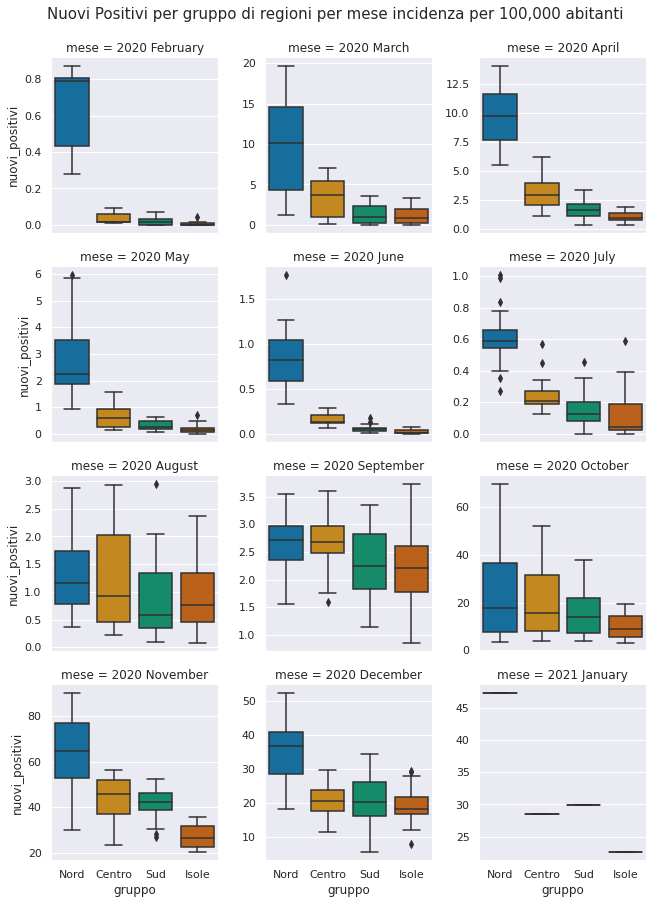

## Nuovi Deceduti

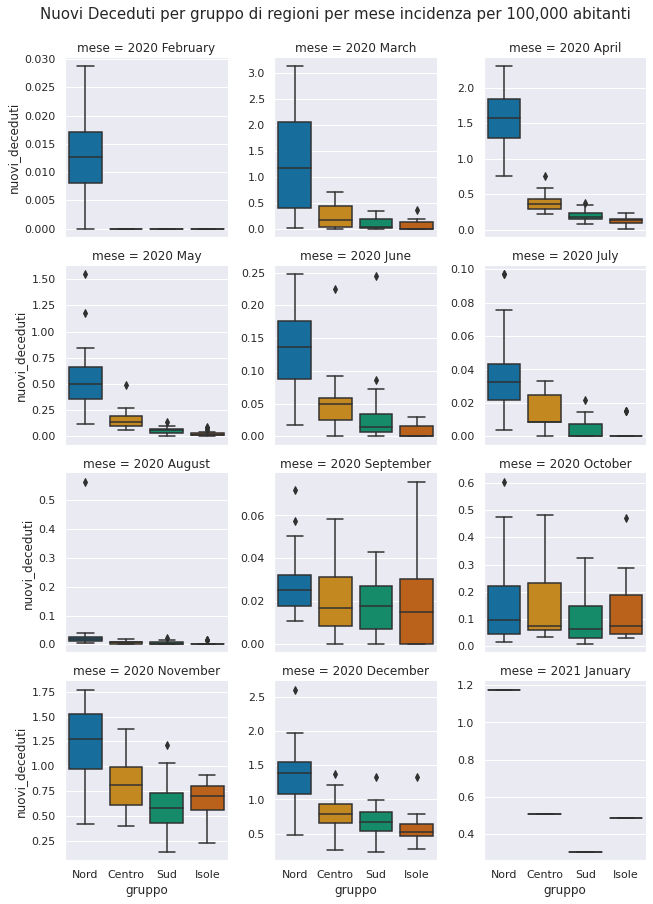

## Nuovi Guariti

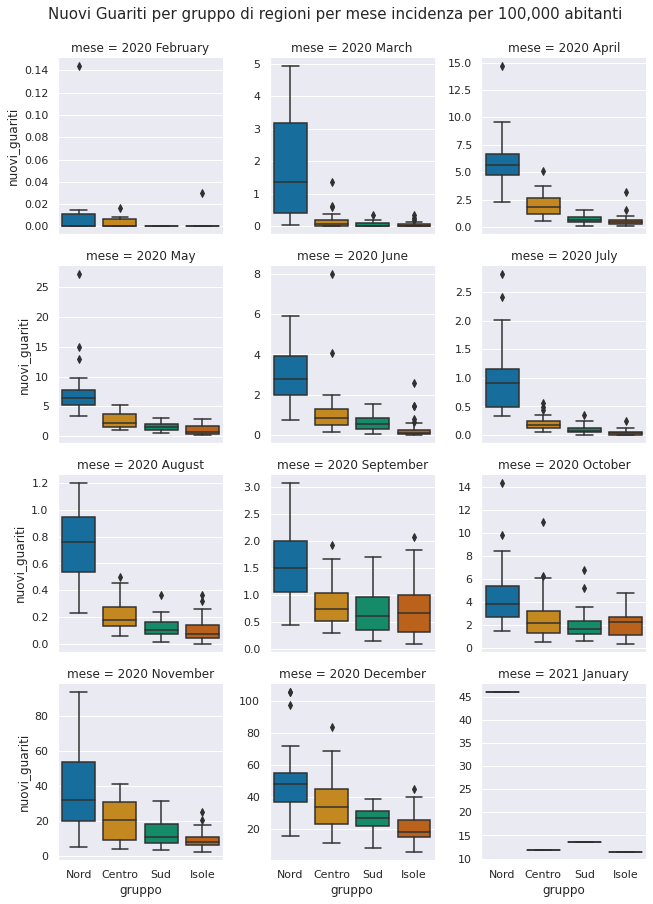

## Totale Positivi

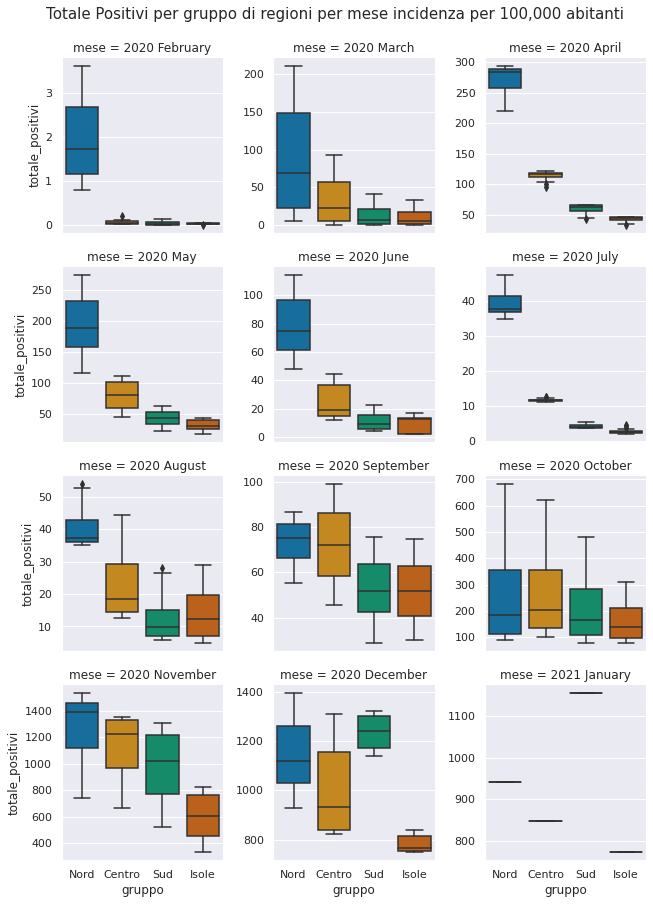

## Totale Ospedalizzati

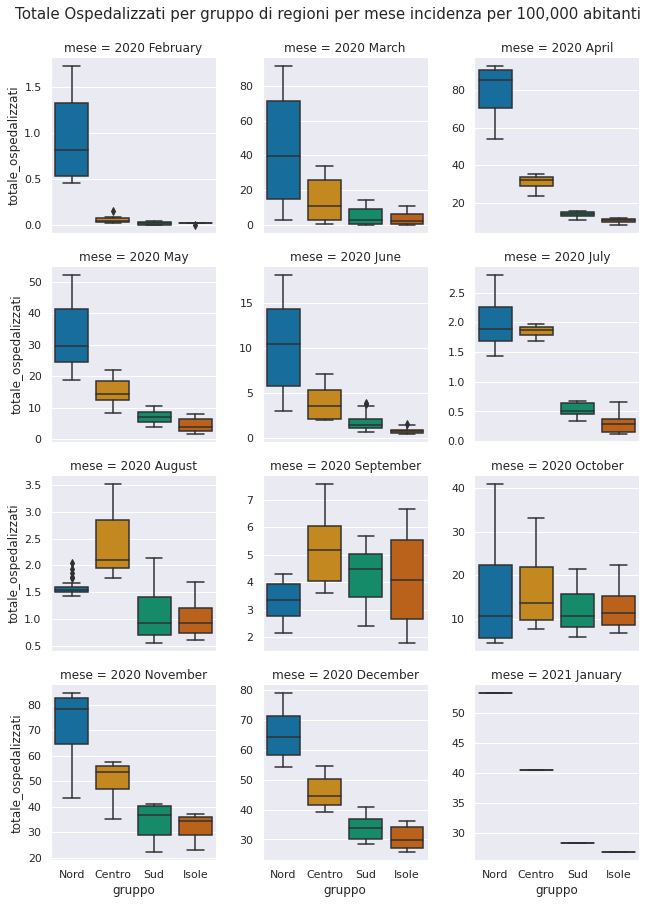

## Terapia Intensiva

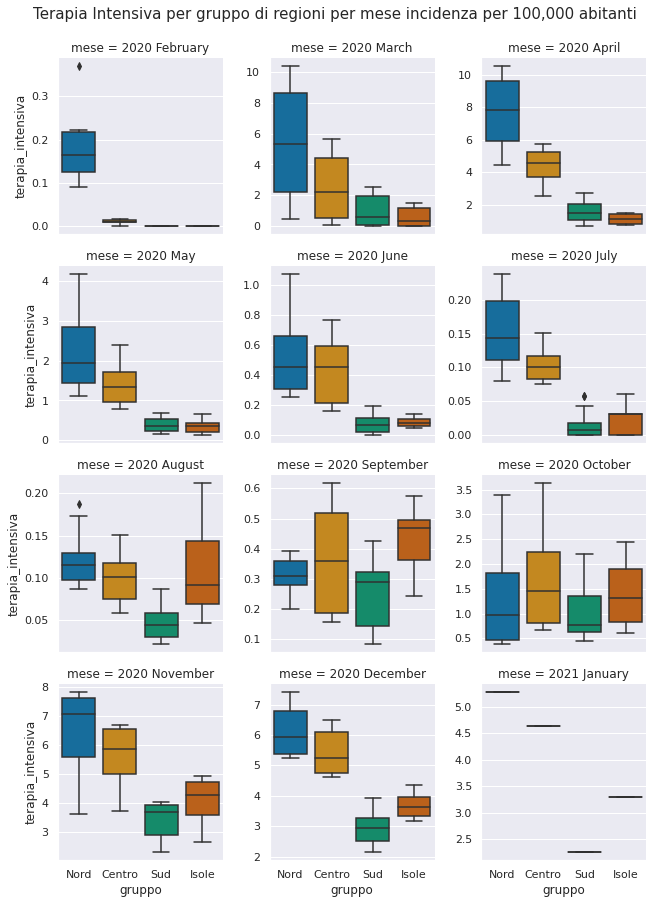

In [27]:
for y in Ys:
    y_name = y.replace("_", " ").title()
    
    display(Markdown(f"## {y_name}"))

    g = sns.catplot(
        kind='box',
        data=pct,
        x='gruppo', y=y,
        col='mese', col_wrap=3,
        #fliersize=0,
        #ci=100, 
        #whis=2,
        #estimator=np.mean,
        height=3,
        sharey=False,
        order=['Nord', 'Centro', 'Sud', 'Isole'],
    )
    g.fig.suptitle(f'{y_name} per gruppo di regioni per mese incidenza per 100,000 abitanti', y=1.025, fontsize=15)
    plt.show();